In [114]:
import torch
import random
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import random_split,DataLoader

In [2]:
dataset = MNIST(root='datasets/', download=True)

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets/
    Split: Train

In [4]:
test_dataset = MNIST(root='datasets/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1B9095D7520>, 5)

Label:  5


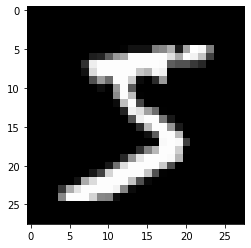

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

Label:  3


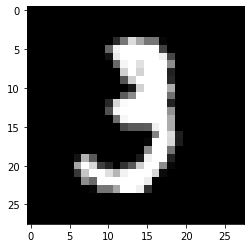

In [7]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [8]:
dataset = MNIST(root='datasets/', train=True, transform= transforms.ToTensor())

In [9]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [10]:
print(img_tensor[:, 10:15, 10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


In [11]:
print(torch.max(img_tensor), torch.min(img_tensor))

tensor(1.) tensor(0.)


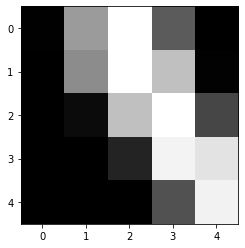

In [12]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [13]:
train_ds, valid_ds = random_split(dataset, [50000,10000])
len(train_ds), len(valid_ds)

(50000, 10000)

In [15]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(valid_ds, batch_size)

In [17]:
#logistic regression model
input_size =  28 * 28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [18]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-2.4075e-02, -2.3290e-03, -9.4668e-03,  ...,  2.5952e-02,
         -1.5333e-02, -3.5206e-02],
        [-7.3549e-03, -1.8963e-02, -2.2294e-02,  ..., -1.8150e-02,
         -1.8718e-02,  6.6168e-03],
        [ 2.7963e-02, -1.9552e-02,  3.4005e-02,  ..., -1.5373e-02,
          5.1136e-03,  1.7941e-02],
        ...,
        [ 1.9086e-02, -3.7987e-03,  1.9474e-02,  ...,  1.8823e-02,
          1.6166e-03,  2.5803e-02],
        [-2.7832e-02, -3.1921e-03, -9.5635e-04,  ..., -3.3998e-02,
          1.1252e-02, -1.5799e-05],
        [-1.2133e-02, -2.1807e-02, -3.0980e-02,  ..., -1.1994e-02,
         -2.6717e-02,  1.4968e-02]], requires_grad=True)

In [20]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0269, -0.0352, -0.0270, -0.0078, -0.0249, -0.0014, -0.0007,  0.0062,
        -0.0209, -0.0292], requires_grad=True)

In [23]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([6, 0, 0, 5, 5, 8, 3, 8, 8, 9, 3, 1, 1, 0, 0, 8, 9, 6, 8, 9, 5, 9, 6, 2,
        0, 2, 5, 3, 8, 1, 4, 4, 6, 8, 7, 9, 1, 7, 3, 7, 0, 9, 8, 4, 1, 1, 3, 2,
        6, 8, 0, 0, 3, 6, 0, 0, 0, 9, 8, 8, 4, 5, 1, 6, 6, 4, 7, 3, 2, 7, 8, 9,
        5, 2, 9, 2, 3, 2, 0, 1, 2, 0, 7, 0, 1, 8, 2, 8, 4, 5, 7, 0, 6, 3, 3, 4,
        9, 6, 2, 1, 6, 3, 0, 6, 3, 8, 3, 9, 3, 7, 3, 6, 2, 7, 8, 2, 1, 3, 3, 3,
        9, 8, 8, 5, 1, 2, 5, 8])
torch.Size([128, 1, 28, 28])


RuntimeError: size mismatch, m1: [3584 x 28], m2: [784 x 10] at C:\w\b\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:41

In [24]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,28*28)
        output = self.linear(xb)
        return output

In [25]:
model = MnistModel()

In [28]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0349, -0.0341,  0.0155,  ...,  0.0322, -0.0200, -0.0164],
         [ 0.0230,  0.0249,  0.0006,  ..., -0.0203,  0.0109, -0.0082],
         [-0.0322,  0.0189, -0.0299,  ...,  0.0343,  0.0134, -0.0084],
         ...,
         [-0.0158,  0.0244,  0.0033,  ...,  0.0083,  0.0311,  0.0183],
         [-0.0233,  0.0002, -0.0316,  ...,  0.0220, -0.0156, -0.0334],
         [-0.0159, -0.0224,  0.0155,  ..., -0.0135,  0.0186,  0.0115]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0109,  0.0127,  0.0340,  0.0026,  0.0082,  0.0171,  0.0163,  0.0168,
          0.0012, -0.0120], requires_grad=True)]

In [29]:
for images, labels in train_loader:
    outputs = model(images)
    break

In [31]:
print('output shape: ', outputs.shape)
print('sample data: ', outputs[:2].data)

output shape:  torch.Size([128, 10])
sample data:  tensor([[-0.7880, -0.1507,  0.3412, -0.7715, -0.2570, -0.3065,  0.2403,  0.2232,
          0.7347, -0.0014],
        [-0.4730, -0.1137, -0.0721, -0.5611, -0.0194, -0.2875,  0.3104,  0.0898,
          0.4124,  0.1374]])


In [35]:
probs = F.softmax(outputs, dim=1)
print("Sample probabilities: ", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:  tensor([[0.0442, 0.0835, 0.1366, 0.0449, 0.0751, 0.0715, 0.1235, 0.1214, 0.2024,
         0.0970],
        [0.0632, 0.0905, 0.0943, 0.0578, 0.0994, 0.0761, 0.1383, 0.1109, 0.1531,
         0.1163]])
Sum:  0.9999999403953552


In [36]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([8, 8, 8, 8, 8, 1, 8, 8, 6, 1, 8, 6, 8, 8, 6, 6, 2, 6, 6, 8, 6, 6, 2, 8,
        9, 6, 8, 9, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 6,
        8, 8, 8, 8, 1, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 2, 6, 8, 8, 6, 8, 8, 8, 8,
        8, 4, 8, 8, 6, 6, 8, 8, 8, 8, 8, 9, 6, 7, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 4, 8, 6, 8, 8, 8, 6, 4, 8, 8, 8, 6, 8, 6, 8, 8, 4, 6, 8, 8, 8,
        8, 8, 8, 6, 8, 6, 8, 8])
tensor([0.2024, 0.1531, 0.1347, 0.1443, 0.1401, 0.1434, 0.1422, 0.1509, 0.1242,
        0.1227, 0.1245, 0.1427, 0.1423, 0.1501, 0.1500, 0.1267, 0.1382, 0.1530,
        0.1198, 0.1607, 0.1306, 0.1298, 0.1426, 0.2335, 0.1145, 0.1471, 0.1494,
        0.1380, 0.1551, 0.1573, 0.1603, 0.1288, 0.1763, 0.1493, 0.1426, 0.1297,
        0.1774, 0.1659, 0.1466, 0.1615, 0.1248, 0.1375, 0.1800, 0.1413, 0.1564,
        0.1371, 0.1449, 0.1184, 0.1330, 0.1427, 0.1352, 0.1425, 0.1369, 0.1483,
        0.1426, 0.1346, 0.1491, 0.1307, 0.1508, 0.1275, 0.1977, 0.1320, 0.1218,
       

In [37]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [39]:
accuracy(outputs, labels)

tensor(0.1406)

In [40]:
loss_fn = F.cross_entropy

In [41]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3352, grad_fn=<NllLossBackward>)


In [92]:
class MnistModel(nn.Module):
    
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 28*28)
        output = self.linear(xb)
        return output
    
    def training_step(self, batch):
        images, labels = batch
        output = self(images)
        loss = F.cross_entropy(output, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        output = self(images)
        val_loss = F.cross_entropy(output, labels)
        val_acc = accuracy(output, labels)
        return {'val_loss':val_loss, 'val_acc':val_acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss, 'val_acc':epoch_acc}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [93]:
model = MnistModel(input_size, num_classes)

In [94]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [95]:
def fit(epochs, lr, model, train_loader, val_loader, optim_func=torch.optim.SGD):
    history = []
    optimizer = optim_func(model.parameters(),lr)
    
    for epoch in range(epochs):
        
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [96]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': tensor(2.3218, grad_fn=<MeanBackward0>),
 'val_acc': tensor(0.0749)}

In [97]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9503, val_acc: 0.6274
Epoch [1], val_loss: 1.6820, val_acc: 0.7231
Epoch [2], val_loss: 1.4808, val_acc: 0.7608
Epoch [3], val_loss: 1.3285, val_acc: 0.7817
Epoch [4], val_loss: 1.2111, val_acc: 0.7950


In [98]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1190, val_acc: 0.8075
Epoch [1], val_loss: 1.0450, val_acc: 0.8171
Epoch [2], val_loss: 0.9846, val_acc: 0.8235
Epoch [3], val_loss: 0.9343, val_acc: 0.8281
Epoch [4], val_loss: 0.8919, val_acc: 0.8332


In [99]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8555, val_acc: 0.8364
Epoch [1], val_loss: 0.8241, val_acc: 0.8391
Epoch [2], val_loss: 0.7965, val_acc: 0.8425
Epoch [3], val_loss: 0.7722, val_acc: 0.8452
Epoch [4], val_loss: 0.7506, val_acc: 0.8478


Text(0.5, 1.0, 'Accuracy')

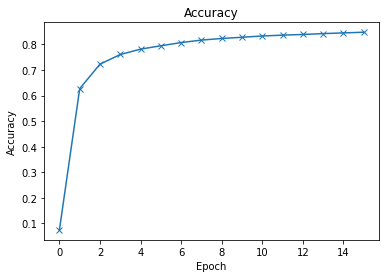

In [102]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

In [103]:
test_dataset = MNIST(root='datasets/',
                    train=False,
                    transform=transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


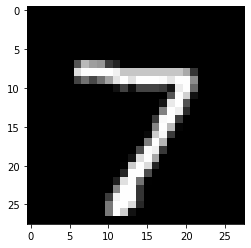

In [105]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape: ', img.shape)
print('Label: ', label)

In [106]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [107]:
def predict(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, pred = torch.max(yb, dim=1)
    return pred[0].item()

Label:  7 Predicted:  7


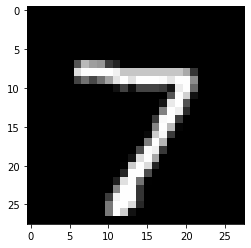

In [115]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label: ', label,'Predicted: ',predict(img, model))

In [116]:
random_test_index = random.sample(range(10000), 5)

In [ ]:
for index in random_test_index:
    img, label = test_dataset[index]
    plt.imshow(img[0], cmap='gray')
    print('Label: ',label, 'Predicted:')